In [2]:
import os

## Download

In [7]:
def download_unzip(url, output_path):
  # os.makedirs(folder, exist_ok=True)
  # os.system(f'wget -O {output_path}.zip {download_url}')
  os.system(f'unzip {output_path} -d {output_path}')
  # os.system(f'tar -xvf {output_path}/*.tar -C {output_path}')
  # os.system(f'rm {output_path}.zip')

download_url = 'http://data.qld.edu.au/public/Q5842/2020-AlzayatSaleh-00e364223a600e83bd9c3f5bcd91045-DeepFish/DeepFish.tar'
folder = '../downloads'
dataset_name = 'deep_fish'
local_path = f'{folder}/{dataset_name}'
download_unzip(download_url, local_path)

Archive:  ../downloads/deep_fish.zip


  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ../downloads/deep_fish or
        ../downloads/deep_fish.zip, and cannot find ../downloads/deep_fish.ZIP, period.


## Visualise

In [26]:
dataset_path = f'{local_path}/training_images'
total_images = 0
for root, dirs, files in os.walk(dataset_path):
  for file in files:
    if file.endswith('.jpg') and not file.startswith('.'):
      total_images += 1

print(f'Total images: {total_images}')


Total images: 3068


path: ../downloads/amazonian_fish/training_images/Tyttocharax/DSC_0078-PM1.jpg
Genus: Tyttocharax


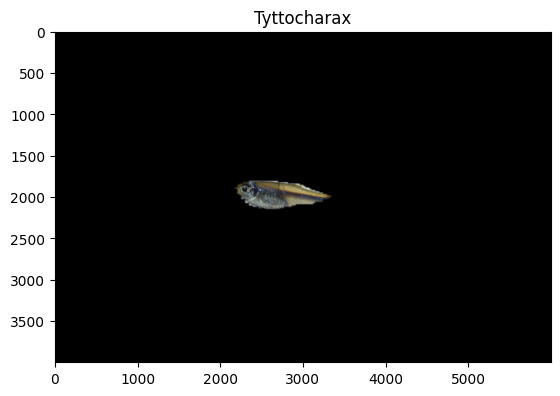

In [32]:
# Sample Image
genus = random.sample([g for g in os.listdir(dataset_path) if not g.startswith('.')], 1)
image = random.sample([f for f in os.listdir(f'{dataset_path}/{genus[0]}') if not f.startswith('.')], 1)
path = os.path.join(dataset_path, genus[0], image[0])
print(f'path: {path}')

# Read annotations
annotation_path = os.path.join(local_path, 'classification_training_images_metadata.csv')
annotation_df = pd.read_csv(annotation_path)

# get value of Genus column for Image_name = iamge
genus = annotation_df[annotation_df['Image_name'] == image[0]]['Genus'].values[0]
print(f'Genus: {genus}')

# Show image and associated genus
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(genus)
plt.show()
